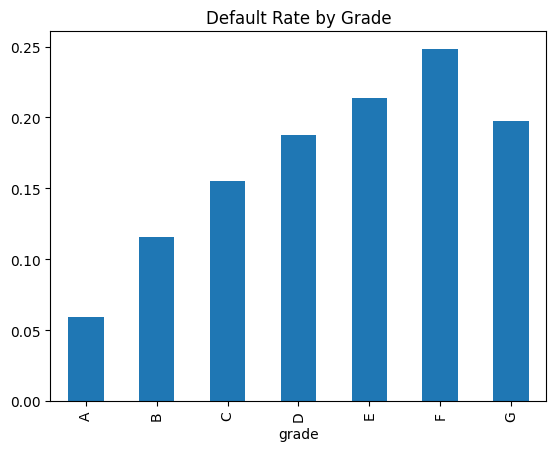

In [1]:
# 1. Load libraries
import duckdb
import matplotlib.pyplot as plt

# 2. Query your staging table directly from DuckDB
con = duckdb.connect('../data/staging/warehouse.duckdb')
df = con.execute("SELECT * FROM stg_loan_stats").df()

# 4. Summary statistics
df[['loan_amount','interest_rate','annual_income','debt_to_income_ratio']].describe()

# 5. Default‐rate by grade
default_by_grade = df.groupby('grade').default_flag.mean()
default_by_grade.plot.bar(title='Default Rate by Grade')
plt.show()


In [6]:
# full‐table summary in Jupyter
df = con.execute("SELECT * FROM stg_loan_stats").df()  # careful with memory!
# or, safer, do aggregations in SQL:
counts = con.execute("""
  SELECT 
    grade,
    COUNT(*) AS total_loans,
    SUM(default_flag) AS defaults,
    AVG(interest_rate) AS avg_int_rate
  FROM stg_loan_stats
  GROUP BY grade
""").df()